2nd attempt at making my own simple neural network!


Neural network with 1 hidden layer of size 2
Current loss: 0.06899120000000004
Inputs: [[0.1]
 [0.3]
 [0.5]
 [0.7]
 [1. ]]
Layer: [[-0.    0.62]
 [-0.    0.46]
 [ 0.1   0.3 ]
 [ 0.26  0.14]
 [ 0.5  -0.  ]]
Outputs: [[0.216]
 [0.728]
 [0.93 ]
 [0.946]
 [0.65 ]]
Weights1: [[ 0.8 -0.8]]
Bias1: [[-0.3  0.7]]
Weights2: [[-3.1]
 [-3.2]]
Bias2: [[2.2]]
dSSR/dPredicted = [[-0.232]
 [ 0.244]
 [ 0.14 ]
 [-0.192]
 [-1.1  ]]
dPredicted/dY = [[-3.1]
 [-3.2]]
dY/dX = [[0. 1.]
 [0. 1.]
 [1. 1.]
 [1. 1.]
 [1. 0.]]
dX/dw1 = [[0.1]
 [0.3]
 [0.5]
 [0.7]
 [1. ]]

Testing epoch #1

Neural network with 1 hidden layer of size 2
Current loss: 0.19832460617893496
Inputs: [[0.1]
 [0.3]
 [0.5]
 [0.7]
 [1. ]]
Layer: [[-0.      0.6205]
 [ 0.0483  0.4614]
 [ 0.2805  0.3023]
 [ 0.5127  0.1432]
 [ 0.861  -0.    ]]
Outputs: [[ 0.2145]
 [ 0.5739]
 [ 0.3631]
 [ 0.1524]
 [-0.    ]]
Weights1: [[ 1.161  -0.7954]]
Bias1: [[-0.3  0.7]]
Weights2: [[-3.1]
 [-3.2]]
Bias2: [[2.2]]
dSSR/dPredicted = [[-0.2291]
 [ 0.5522]
 [ 1.27

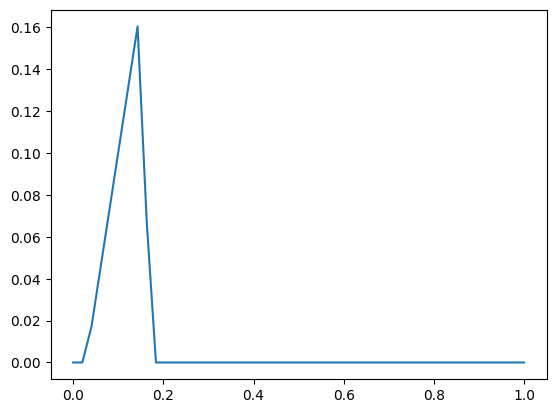

In [79]:
import numpy as np
from matplotlib import pyplot as plt

def sigmoid(x):
    return 1/(1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def relu(x):
    return np.where(x > 0, x, x * 0.00)

def relu_derivative(x):
    return np.where(x > 0, 1, 0.00)

activation = relu
d_activation = relu_derivative

np.set_printoptions(precision=4, linewidth=200)

class NeuralNet:
    # What is the type of x and y???
    def __init__(self, x, y):
        self.x = x
        self.y = y
        self.input = self.x
        # self.weights1 = np.random.rand(x.shape[1], 2) - 0.5
        # self.bias1 = np.zeros(2)
        # self.weights2 = np.random.rand(2, 1) - 0.5
        # self.bias2 = np.zeros(1)
        # self.weights1 = np.array([[1, -1]])
        self.weights1 = np.array([[0.8, -0.8]])
        self.bias1 = np.array([[-0.3, 0.7]])
        self.weights2 = np.array([[-3.1], [-3.2]])
        self.bias2 = np.array([[2.2]])
        self.output = np.zeros(self.y.shape)
        self.learning_rate = 0.1

    def feedforward(self):
        # print(f"layer1 z = {np.dot(self.input, self.weights1) + self.bias1}")
        layer1 = activation(np.dot(self.input, self.weights1) + self.bias1)
        self.layer1 = layer1
        # print(f"layer1 = {self.layer1}")
        # print(f"output z = {np.dot(self.layer1, self.weights2) + self.bias2}")
        output = activation(np.dot(layer1, self.weights2) + self.bias2)
        self.output = output
        # print(f"output = {self.output}")

    def backpropagate(self):
        d_weights2 = np.dot(self.layer1.T, (2*(self.y - self.output) * d_activation(self.output)))
        # print(f"d_weights2 = f{d_weights2}")
        # print(f"  2*(self.y - self.output) = f{2*(self.y - self.output)}")
        # print(f"  d_activation(self.output) = f{d_activation(self.output)}")
        # print(f"  z = f{2*(self.y - self.output) * d_activation(self.output)}")
        d_bias2 = np.sum(2*(self.y - self.output) * d_activation(self.output), axis=0)
        # print(f"d_bias2 = f{d_bias2}")
        # print(f"  2*(self.y - self.output) = f{2*(self.y - self.output)}")
        # print(f"  d_activation(self.output) = f{d_activation(self.output)}")
        # print(f"  z = f{2*(self.y - self.output) * d_activation(self.output)}")
        # self.weights2 += d_weights2 * self.learning_rate
        # self.bias2 += d_bias2 * self.learning_rate

        # dSSR/dPredicted = [[0.]
        #  [2.]
        #  [0.]]
        # dPredicted/dY = [[-3.1]
        #  [-3.2]]
        # dY/dX = [[1. 1.]
        #  [1. 1.]
        #  [1. 1.]]
        # dX/dw1 = [[0. ]
        #  [0.5]
        #  [1. ]]

        # d_weights2 = np.dot(self.layer1.T, (2*(self.y - self.output) * d_activation(self.output)))
        d_weights1 = np.dot(self.input.T,  (np.dot(2*(self.y - self.output) * d_activation(self.output), self.weights2.T) * d_activation(self.layer1)))
        print(f"dSSR/dPredicted = {2*(self.y - self.output)}")
        print(f"dPredicted/dY = {self.weights2}")  # Y is output of layer1, aka L[i]
        print(f"dY/dX = {d_activation(self.layer1)}")  # X is w1 * L[i-1] + b of layer1
        print(f"dX/dw1 = {self.input}")
        d_bias1 = (np.dot(2*(self.y - self.output) * d_activation(self.output), self.weights2.T) * d_activation(self.layer1))
        # print(f"d_bias1 = {d_bias1}")
        d_bias1 = np.sum(np.dot(2*(self.y - self.output) * d_activation(self.output), self.weights2.T) * d_activation(self.layer1), axis=0)
        # print(f"d_bias1 summed = {d_bias1}")
        # print(f"2*(self.y - self.output) = {2*(self.y - self.output)}")
        # print(f"d_activation(self.output) = {d_activation(self.output)}")
        # print(f"np.dot(2*(self.y - self.output) * d_activation(self.output), self.weights2.T) = {np.dot(2*(self.y - self.output) * d_activation(self.output), self.weights2.T)}")
        # print(f"d_activation(self.layer1) = {d_activation(self.layer1)}")

        self.weights1 += d_weights1 * self.learning_rate
        # self.bias1 += d_bias1 * self.learning_rate

    def display(self):
        print()
        print("Neural network with 1 hidden layer of size 2")
        print(f"Current loss: {self.loss()}")
        print(f"Inputs: {self.input}")
        print(f"Layer: {self.layer1}")
        print(f"Outputs: {self.output}")
        print(f"Weights1: {self.weights1}")
        print(f"Bias1: {self.bias1}")
        print(f"Weights2: {self.weights2}")
        print(f"Bias2: {self.bias2}")

    def test(self, inputs):
        #print(f"layer1 z = {np.dot(inputs, self.weights1) + self.bias1}")
        layer1 = activation(np.dot(inputs, self.weights1) + self.bias1)
        #print(f"layer1 = {self.layer1}")
        #print(f"output z = {np.dot(self.layer1, self.weights2) + self.bias2}")
        output = activation(np.dot(layer1, self.weights2) + self.bias2)
        #print(f"output = {self.output}")
        return output

    def loss(self):
        return np.average((self.y - self.output) ** 2)

    def mean_of_square_errors(predicted, actual):
        if len(predicted) != len(actual):
            sys.exit("mean_of_square_errors: Predict and actual are different length")
        sum = 0
        for i in range(len(predicted)):
            sum += (predicted[i] - actual[i]) ** 2
        return sum / len(predicted)

# Add function to plot shape of x vs y
def plot(nn):
    x = np.linspace(0, 1)
    y = nn.test(np.array(x)[np.newaxis].T)
    plt.plot(x,y)

x = np.array([ [0.1], [0.3], [0.5], [0.7], [1] ])
y = np.array([ [0.1], [0.85], [1], [0.85], [0.1] ])

nn = NeuralNet(x,y)

nn.feedforward()
nn.display()
for i in range(300):
    nn.backpropagate()
    nn.feedforward()
    print(f"\nTesting epoch #{i+1}")
    nn.display()
    if nn.loss() < 0.01:
        break

plot(nn)
